In [1]:
import numpy as np
import pandas as pd
import os
from PIL import Image
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPClassifier
from sklearn import metrics
from sklearn.svm import SVC

from joblib import dump, load

In [2]:
image_size = (28,28)
channels = 1
folder_path = r"digits"
labels = os.listdir(folder_path)

In [3]:
#Creating a dataset for the images in all folders
X = []
y = []
for label in labels:
    image_folder = os.path.join(folder_path, label)
    images = os.listdir(image_folder)
    for img_id in images:
        image = Image.open(os.path.join(image_folder, img_id)).convert("L")
        X.append(np.array(image).reshape(784))
        y.append(label)

X = np.array(X)/256
y = np.int_(y)

In [4]:
print(X.shape)
print(y.shape)

(3456, 784)
(3456,)


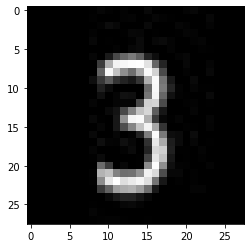

In [5]:
plt.imshow(X[1000].reshape(28,28), cmap = "gray")

In [6]:
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.15, random_state=42, stratify = y)
X_train.shape, X_val.shape, y_train.shape, y_val.shape

((2937, 784), (519, 784), (2937,), (519,))

In [7]:
from sklearn.neural_network import MLPClassifier
MLP_model = MLPClassifier(hidden_layer_sizes=(400, 100, 25), max_iter=250, alpha=1e-4, solver='sgd', verbose=100, random_state=42, learning_rate_init=.1, n_iter_no_change = 50).fit(X_train, y_train)
print("train accuracy: ",MLP_model.score(X_train, y_train))

Iteration 1, loss = 2.24476911
Iteration 2, loss = 2.03956185
Iteration 3, loss = 1.74669554
Iteration 4, loss = 1.41213532
Iteration 5, loss = 1.13818492
Iteration 6, loss = 0.97793390
Iteration 7, loss = 0.91747396
Iteration 8, loss = 0.71278829
Iteration 9, loss = 1.14057891
Iteration 10, loss = 0.48335926
Iteration 11, loss = 0.26431328
Iteration 12, loss = 0.14900470
Iteration 13, loss = 0.08408801
Iteration 14, loss = 0.04232354
Iteration 15, loss = 0.02380673
Iteration 16, loss = 0.01056197
Iteration 17, loss = 0.00668847
Iteration 18, loss = 0.00492540
Iteration 19, loss = 0.00377658
Iteration 20, loss = 0.00313652
Iteration 21, loss = 0.00267379
Iteration 22, loss = 0.00240684
Iteration 23, loss = 0.00218571
Iteration 24, loss = 0.00200735
Iteration 25, loss = 0.00185770
Iteration 26, loss = 0.00174402
Iteration 27, loss = 0.00163124
Iteration 28, loss = 0.00153919
Iteration 29, loss = 0.00146044
Iteration 30, loss = 0.00138860
Iteration 31, loss = 0.00132446
Iteration 32, los

In [8]:
y_pred = MLP_model.predict(X_val)
print("vaidation accuracy: ",MLP_model.score(X_val, y_val))

vaidation accuracy:  0.8709055876685935


In [9]:
dump(MLP_model, 'model_dumps/MLP_onPrinted.joblib')

['model_dumps/MLP_onPrinted.joblib']